In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#creating a start date and end date
start = '2010-01-01'
end =  datetime.today().strftime("%Y-%m-%d")
#end = '2019-12-31'

#creating the dataframe
df= data.DataReader('AAPL', 'yahoo', start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

                High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0   6.515212
2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0   6.526477
2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0   6.422664
2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0   6.410792
2010-01-08  7.571429  7.466429  7.510714  7.570714  447610800.0   6.453411
                  High         Low        Open       Close      Volume  \
Date                                                                     
2022-12-05  150.919998  145.770004  147.770004  146.630005  68826400.0   
2022-12-06  147.300003  141.919998  147.070007  142.910004  64727200.0   
2022-12-07  143.369995  140.000000  142.190002  140.940002  69721100.0   
2022-12-08  143.520004  141.100006  142.360001  142.649994  62128300.0   
2022-12-09  145.570007  140.899

(3258, 6)

Empty DataFrame
Columns: [High, Low, Open, Close, Volume, Adj Close]
Index: []
------------------------------checking data information-------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3258 entries, 2010-01-04 to 2022-12-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3258 non-null   float64
 1   Low        3258 non-null   float64
 2   Open       3258 non-null   float64
 3   Close      3258 non-null   float64
 4   Volume     3258 non-null   float64
 5   Adj Close  3258 non-null   float64
dtypes: float64(6)
memory usage: 178.2 KB
------------------------------checking data shape-------------
(3258, 6)
------------------------------checking data description-------------
              High          Low         Open        Close        Volume  \
count  3258.000000  3258.000000  3258.000000  3258.000000  3.258000e+03   
mean     51.504641    50.379134    50.935750    50.963450  2.570043e+08   

<AxesSubplot: xlabel='Date'>

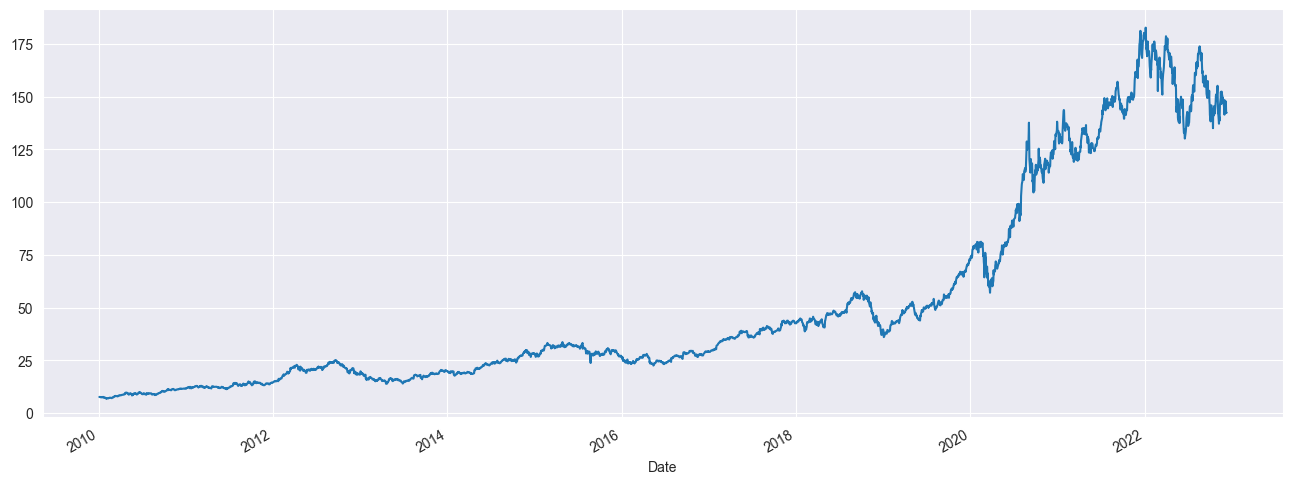

In [9]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
print("------------------------------checking data information-------------")
df.info()
print("------------------------------checking data shape-------------")
print(df.shape)
print("------------------------------checking data description-------------")
print(df.describe())
df['Open'].plot(figsize=(16,6))

In [10]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
df = df.reset_index()
df.head()
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


In [11]:
#seperate the data into train and test data

train_headers = ['High','Low', 'Open','Volume']
target_headers = ['Close']

x = df[train_headers]
y = df[target_headers].pop('Close')

print(x.shape)
print(y.shape)

#we are going to scale down all the values we have so that they fit inbetween 0 and 1
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
train_header_array = scaler.fit_transform(x)

train_header_array

X_train, X_test, y_train, y_test = train_test_split(train_header_array,y, test_size = 0.3, random_state =1)

print(X_train.shape)
print(X_test.shape)

(3258, 4)
(3258,)
(2280, 4)
(978, 4)


In [12]:
# setting up the Linear regression model
from sklearn.linear_model import LinearRegression

rgr = LinearRegression()
rgr.fit(X_train, y_train)

#getting the coefficient and intercept of the model
print('The coefficient of the model is ',rgr.coef_)
print('The intercept of the model is ',rgr.intercept_)

The coefficient of the model is  [ 1.48221407e+02  1.35328547e+02 -1.10393826e+02  1.19170142e-03]
The intercept of the model is  6.925507092576922


In [13]:

#predict the model
y_pred = rgr.predict(X_test)
print(y_pred)
print(y_test)

print(X_test)

#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)


[ 18.89677315  24.29496952  12.55862756  24.81694932  34.81160111
  25.03031223  26.57081018  29.72653876  16.7070953   41.53021384
  43.5084566   31.31854759  60.05951865  24.1404941   27.00295603
  23.32708579  37.44274336  18.65685596  42.62958217  29.03684741
  11.92305773   8.82080375 128.17957551  14.41534328  46.54760139
  21.95176131  32.40152768  18.99829215  10.13880903  16.77003749
  12.61697086  18.62968431  47.12822913  24.53330817  70.06124435
  17.98229743  18.67354181  22.54600264  91.22471088   9.04172585
 126.34857039  35.20149971 123.46769866 151.65898207  12.09092409
  18.88609039   7.14261974  19.04562024 159.56480757 133.33601248
 141.4246538   54.80045051  13.82363462  48.65674721  47.88651716
 177.93848291 142.34605177  38.13464377   7.41583537  39.15125621
  35.85220339  42.94596812 159.74256116  28.01933493  28.37840986
  42.5587011   60.63289615  18.57569769   9.44735035  10.99393234
  51.57865181  28.32746543  27.93180586  13.99738788  66.66364184
  27.40869

In [14]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
1060     19.031071        18.896773
1642     24.217501        24.294970
297      12.588214        12.558628
1525     24.997499        24.816949
1802     34.740002        34.811601
...            ...              ...
2673    114.607498       114.403530
2062     44.610001        44.622072
3230    150.649994       150.675230
555      20.913214        20.830414
186      10.263214        10.305887

[978 rows x 2 columns]


In [15]:
dfr.head(10)

,Actual Price,Predicted Price
1060,19.031071,18.896773
1642,24.217501,24.294970
297,12.588214,12.558628
1525,24.997499,24.816949
1802,34.740002,34.811601
1197,24.905001,25.030312
1678,26.682501,26.570810
1767,29.777500,29.726539
902,16.766071,16.707095
2253,41.369999,41.530214


<AxesSubplot: >

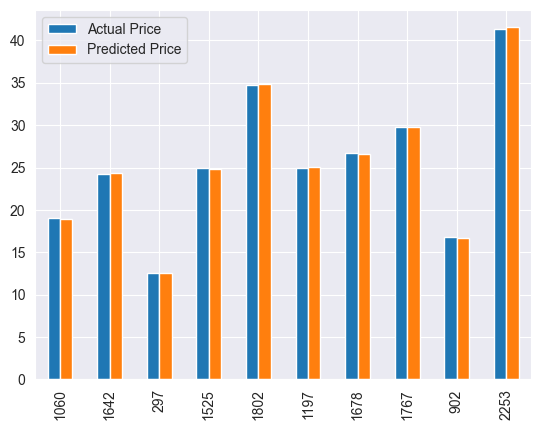

In [16]:
graph=dfr.head(10)
graph.plot(kind='bar')